In [77]:
import pandas as pd

In [78]:
meta = pd.read_csv('metadata_patiens_20250401.csv', sep='\t', decimal=',')

meta.head()

,Sample_ID,Gender,Age(years),Location of aspergilloma,Diameter of fungal ball(mm),Duration of symptoms(years),Cough,Haemoptysis,Tuberculosis,Bronchiectasis,...,Eosinophil( *10^9/L),Monocyte( *10^9/L),Lymphocyte( *10^9/L),Neu(%),Bas(%),Eos(%),Mono(%),Lym(%),Hemoglobin( g/L),Platelet( g/L)
0,A1,male,48,Right upper lobe,19.0,1.75,1,1,0,0,...,2.91,0.54,2.55,30.8,0.9,33.1,6.2,29.0,129,86
1,A2,female,51,Left lower lobe,14.0,0.42,1,1,0,0,...,0.02,0.28,0.98,74.9,0.8,0.4,5.3,18.6,135,209
2,A3,male,47,Left lower lobe,5.0,17.00,1,1,0,0,...,0.24,0.61,1.39,60.6,0.3,4.2,10.6,24.3,118,304
3,A4,male,64,Left lower lobe,25.4,0.25,0,0,0,0,...,0.09,0.41,0.66,70.3,0.3,2.3,10.4,16.7,150,197
4,A5,male,60,Left upper lobe,51.0,2.00,1,1,0,0,...,0.25,0.55,0.81,75.0,1.0,3.7,8.2,12.1,143,277


In [79]:
meta.shape

(61, 35)

In [80]:
its = pd.read_csv('ITS-taxa.tsv', sep='\t')
its.set_index('sample-id', inplace=True)
its.head()

,s__Aspergillus_fumigatus,s__Aspergillus_flavus,Other Aspergillus,g__Scedosporium,g__Schizophyllum,g__Rhizoplaca,g__Blumeria,g__Alternaria,g__Archaeorhizomyces,g__Saitozyma,g__Trichoderma,g__Tausonia,g__Cryptococcus,g__Rasamsonia,g__Vishniacozyma,Other
sample-id,,,,,,,,,,,,,,,,
A1,2074,0,0,0,0,0,0,9,3,37,25,0,0,0,1,94
A10,0,7,0,2151,0,12,0,2,8,10,1,0,0,0,0,59
A11,0,164,0,0,0,0,0,2,428,357,267,1,0,0,0,1031
A12,0,173,0,0,5,1,0,1,457,379,225,0,0,0,0,1009
A13,2250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [81]:
its['s__Aspergillus_fumigatus']/its.sum(axis=1)

sample-id
A1     0.924654
A10    0.000000
A11    0.000000
A12    0.000000
A13    1.000000
A14    1.000000
A15    0.971111
A16    0.992889
A17    0.000896
A18    0.999556
A19    0.963952
A2     0.862222
A20    0.000000
A21    0.000000
A22    0.994667
A23    0.999556
A24    0.992000
A25    0.936889
A26    0.995111
A27    0.976868
A3     0.000000
A30    1.000000
A31    0.999556
A32    1.000000
A33    0.995102
A34    0.000000
A35    0.999111
A36    0.989778
A37    0.000000
A38    0.999111
A39    0.218708
A4     0.013951
A40    0.997332
A41    0.000000
A42    0.945778
A43    0.000000
A44    0.995998
A45    0.032011
A46    0.099573
A48    0.999556
A5     0.247111
A50    0.000000
A51    0.949933
A52    1.000000
A53    0.375723
A54    0.000000
A55    0.000000
A56    0.001778
A57    0.997333
A58    0.997333
A59    0.954991
A6     0.918667
A60    0.992444
A61    0.976827
A62    0.997778
A7     0.946174
A8     0.996000
A9     0.000000
dtype: float64

In [82]:
afm_prop = its['s__Aspergillus_fumigatus']/its.sum(axis=1)

In [83]:
its.loc[afm_prop>0.5, 'afm_prop'] = '>50'
its.loc[afm_prop<0.5, 'afm_prop'] = '<50'

In [84]:
its['afm_prop'].value_counts()

afm_prop
>50    36
<50    22
Name: count, dtype: int64

In [85]:
its.reset_index(inplace=True)
its.head()

,sample-id,s__Aspergillus_fumigatus,s__Aspergillus_flavus,Other Aspergillus,g__Scedosporium,g__Schizophyllum,g__Rhizoplaca,g__Blumeria,g__Alternaria,g__Archaeorhizomyces,g__Saitozyma,g__Trichoderma,g__Tausonia,g__Cryptococcus,g__Rasamsonia,g__Vishniacozyma,Other,afm_prop
0,A1,2074,0,0,0,0,0,0,9,3,37,25,0,0,0,1,94,>50
1,A10,0,7,0,2151,0,12,0,2,8,10,1,0,0,0,0,59,<50
2,A11,0,164,0,0,0,0,0,2,428,357,267,1,0,0,0,1031,<50
3,A12,0,173,0,0,5,1,0,1,457,379,225,0,0,0,0,1009,<50
4,A13,2250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,>50


In [86]:
meta['Sample_ID']

0      A1
1      A2
2      A3
3      A4
4      A5
     ... 
56    A58
57    A59
58    A60
59    A61
60    A62
Name: Sample_ID, Length: 61, dtype: object

In [87]:
meta = pd.merge(meta, its[['sample-id', 'afm_prop']] , left_on='Sample_ID', right_on='sample-id')
meta.head()

,Sample_ID,Gender,Age(years),Location of aspergilloma,Diameter of fungal ball(mm),Duration of symptoms(years),Cough,Haemoptysis,Tuberculosis,Bronchiectasis,...,Lymphocyte( *10^9/L),Neu(%),Bas(%),Eos(%),Mono(%),Lym(%),Hemoglobin( g/L),Platelet( g/L),sample-id,afm_prop
0,A1,male,48,Right upper lobe,19.0,1.75,1,1,0,0,...,2.55,30.8,0.9,33.1,6.2,29.0,129,86,A1,>50
1,A2,female,51,Left lower lobe,14.0,0.42,1,1,0,0,...,0.98,74.9,0.8,0.4,5.3,18.6,135,209,A2,>50
2,A3,male,47,Left lower lobe,5.0,17.00,1,1,0,0,...,1.39,60.6,0.3,4.2,10.6,24.3,118,304,A3,<50
3,A4,male,64,Left lower lobe,25.4,0.25,0,0,0,0,...,0.66,70.3,0.3,2.3,10.4,16.7,150,197,A4,<50
4,A5,male,60,Left upper lobe,51.0,2.00,1,1,0,0,...,0.81,75.0,1.0,3.7,8.2,12.1,143,277,A5,<50


In [106]:
df = pd.read_csv('all_sample_data.csv', sep='\t', decimal=',')

df.head()

,Index,Mode,Compounds,物质,Class I,物质一级分类,Class II,物质二级分类,Formula,Q1 (Da),...,A60,A61,A62,QC01,QC02,QC03,QC04,QC05,QC06,kegg_map
0,MW0110455,T3_positive,Val-val,缬氨酸-缬氨酸,Amino acid and Its metabolites,氨基酸及其代谢物,Small Peptide,小肽,C10H20N2O3,217.1555,...,1.718096e+09,2.233794e+09,2.334188e+09,1.151505e+09,1.160221e+09,1.159124e+09,1.167345e+09,1.176833e+09,1.165631e+09,-
1,MW0010027,T3_positive,L-Valine,L-缬氨酸,Amino acid and Its metabolites,氨基酸及其代谢物,Amino acids,氨基酸,C5H11NO2,118.0865,...,3.861140e+09,3.316961e+09,3.909767e+09,3.573906e+09,3.621734e+09,3.623393e+09,3.611431e+09,3.541350e+09,3.659957e+09,"ko00280,ko00290,ko00311,ko00460,ko00770,ko0097..."
2,MW0169283,T3_positive,2-Amino-1-phenylethanol,2-氨基-1-苯基乙醇,Alcohol and amines,醇、胺类,Alcohols,醇类,C8H11NO,120.0814,...,1.161093e+10,3.365948e+09,8.642088e+09,8.849230e+09,8.979965e+09,8.340497e+09,8.838534e+09,7.889298e+09,8.588933e+09,-
3,MW0193946,T3_positive,L-Tryptophan,L-色氨酸,Amino acid and Its metabolites,氨基酸及其代谢物,Amino acids,氨基酸,C11H12N2O2,205.0974,...,2.557369e+09,2.449712e+09,3.248462e+09,2.621408e+09,2.591585e+09,2.609092e+09,2.634881e+09,2.629609e+09,2.622157e+09,"ko00260,ko00380,ko00400,ko00404,ko00901,ko0097..."
4,MW0108213,T3_positive,Methionine,蛋氨酸,Amino acid and Its metabolites,氨基酸及其代谢物,Amino acids,氨基酸,C5H11NO2S,150.0590,...,1.968537e+08,3.024857e+08,8.166263e+07,2.687281e+08,2.684375e+08,2.666667e+08,2.837021e+08,2.644579e+08,2.583546e+08,"ko00270,ko00470,ko00970,ko00999,ko01100,ko0111..."


In [89]:
df['Mode'].value_counts()

Mode
T3_positive    3036
T3_negative    2097
Name: count, dtype: int64

In [90]:
df.shape

(5133, 87)

In [91]:
df.columns

Index(['Index', 'Mode', 'Compounds', '物质', 'Class I', '物质一级分类', 'Class II',
       '物质二级分类', 'Formula', 'Q1 (Da)', 'Molecular weight (Da)', 'RT (min)',
       'Adduct', 'Mass error', 'Level', 'score', 'LC mode', 'CAS',
       'PubChem CID', 'HMDB', 'Metlin', 'cpd_ID', 'A1', 'A2', 'A3', 'A4', 'A5',
       'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A17',
       'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27',
       'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37',
       'A38', 'A39', 'A40', 'A41', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48',
       'A51', 'A52', 'A53', 'A54', 'A55', 'A56', 'A57', 'A58', 'A59', 'A60',
       'A61', 'A62', 'QC01', 'QC02', 'QC03', 'QC04', 'QC05', 'QC06',
       'kegg_map'],
      dtype='object')

In [92]:
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [93]:
df[df.columns[df.columns.str.contains('A|Q')][3:]]

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A59,A60,A61,A62,QC01,QC02,QC03,QC04,QC05,QC06
0,9.646335e+08,1.081988e+09,1.831648e+09,1.138947e+08,9.285785e+08,1.242004e+09,5.527047e+08,1.107269e+09,9.647789e+08,8.381382e+08,...,1.584364e+09,1.718096e+09,2.233794e+09,2.334188e+09,1.151505e+09,1.160221e+09,1.159124e+09,1.167345e+09,1.176833e+09,1.165631e+09
1,1.330857e+09,2.540254e+09,2.822190e+09,6.137188e+09,2.964554e+09,5.422176e+09,5.489074e+09,5.109170e+09,3.081993e+09,4.540715e+09,...,3.770223e+09,3.861140e+09,3.316961e+09,3.909767e+09,3.573906e+09,3.621734e+09,3.623393e+09,3.611431e+09,3.541350e+09,3.659957e+09
2,8.208213e+09,6.074117e+09,1.158623e+10,1.456331e+10,7.227553e+09,5.441181e+09,1.475994e+10,5.123521e+09,8.513841e+09,1.320493e+10,...,4.658072e+09,1.161093e+10,3.365948e+09,8.642088e+09,8.849230e+09,8.979965e+09,8.340497e+09,8.838534e+09,7.889298e+09,8.588933e+09
3,2.063104e+09,1.008159e+09,1.707395e+09,4.831823e+09,2.328123e+09,2.382131e+09,5.027210e+09,1.646685e+09,2.405563e+09,3.514595e+09,...,2.708928e+09,2.557369e+09,2.449712e+09,3.248462e+09,2.621408e+09,2.591585e+09,2.609092e+09,2.634881e+09,2.629609e+09,2.622157e+09
4,2.570075e+08,4.365356e+07,3.320783e+08,5.782602e+08,3.038738e+08,2.313289e+08,3.066780e+08,1.121515e+08,1.350714e+08,2.843573e+08,...,7.062044e+07,1.968537e+08,3.024857e+08,8.166263e+07,2.687281e+08,2.684375e+08,2.666667e+08,2.837021e+08,2.644579e+08,2.583546e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5128,6.201661e+06,8.596504e+06,2.110614e+07,4.080973e+07,3.043885e+07,1.421661e+07,6.883592e+06,1.362819e+07,2.004818e+07,1.388347e+07,...,1.289876e+07,1.120846e+07,1.643212e+07,9.540163e+05,1.345399e+07,1.378329e+07,1.391284e+07,1.375209e+07,1.366121e+07,1.331530e+07
5129,1.150782e+07,5.713847e+05,4.303449e+06,1.599329e+06,6.069275e+06,2.672193e+06,1.926812e+06,3.410193e+05,4.272538e+05,2.505394e+06,...,2.308429e+06,6.261277e+05,6.725228e+06,1.745957e+06,2.614981e+06,2.633890e+06,2.555292e+06,2.668234e+06,2.812042e+06,2.549537e+06
5130,1.853894e+05,3.053847e+05,3.011368e+06,3.216948e+05,1.778789e+05,3.036335e+05,1.221431e+06,1.223206e+05,2.906945e+06,1.596241e+05,...,7.458259e+04,8.117348e+05,1.933923e+05,1.855524e+05,3.229409e+05,2.917343e+05,3.090462e+05,3.167795e+05,2.431904e+05,3.391581e+05
5131,3.306753e+06,5.042669e+06,8.541443e+06,1.235255e+06,2.000729e+06,3.432055e+06,2.646006e+06,2.950634e+06,7.422404e+06,2.031627e+06,...,1.314478e+07,2.113528e+06,1.218703e+07,1.271569e+07,5.580782e+06,5.613683e+06,5.673772e+06,5.624071e+06,5.592078e+06,5.628880e+06


In [94]:
meta.tail()

,Sample_ID,Gender,Age(years),Location of aspergilloma,Diameter of fungal ball(mm),Duration of symptoms(years),Cough,Haemoptysis,Tuberculosis,Bronchiectasis,...,Lymphocyte( *10^9/L),Neu(%),Bas(%),Eos(%),Mono(%),Lym(%),Hemoglobin( g/L),Platelet( g/L),sample-id,afm_prop
53,A58,male,34,Left lower lobe,17.7,0.25,0,1,0,0,...,1.61,49.2,0.5,1.6,9.7,38.9,129,176,A58,>50
54,A59,male,50,Right upper lobe,23.0,1.00,1,1,1,1,...,1.51,59.1,0.2,1.6,9.3,29.8,147,145,A59,>50
55,A60,male,50,Left upper lobe,29.0,1.42,1,1,0,1,...,1.55,61.6,0.2,2.1,9.2,26.9,143,210,A60,>50
56,A61,male,51,Right upper lobe,20.0,1.50,1,0,0,0,...,1.69,50.9,0.6,1.5,12.3,31.2,149,245,A61,>50
57,A62,male,39,Right lower lobe,45.0,4.00,1,0,1,1,...,1.38,70.9,0.6,3.2,5.9,19.4,160,162,A62,>50


In [95]:
df = df[df['Mode']=='T3_negative']

In [107]:
data = df[df.columns[df.columns.str.contains('A')][2:]]
data.shape

(5133, 58)

In [97]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A53,A54,A55,A56,A57,A58,A59,A60,A61,A62
3036,6.568123e+08,5.805315e+08,1.620530e+09,1.854414e+08,5.161476e+08,5.479006e+08,6.244220e+08,3.305789e+08,1.343574e+09,4.511378e+08,...,2.319393e+09,4.833729e+07,14832197.60,1.421244e+09,1.880936e+09,9.263087e+08,1.414256e+09,3.893574e+08,9.042556e+08,1.568465e+09
3037,8.769738e+05,1.029913e+08,9.162321e+07,9.814968e+07,4.204111e+07,1.282209e+08,1.098565e+08,1.402086e+08,1.640820e+08,9.082655e+07,...,7.677969e+07,1.799423e+07,64714274.40,5.472982e+07,2.305300e+08,5.746603e+08,6.295179e+07,9.781142e+07,1.234441e+08,1.551327e+08
3038,7.507434e+08,9.821654e+07,4.862377e+07,1.688817e+07,1.648203e+08,7.301891e+07,1.436260e+07,4.323245e+07,2.083337e+07,3.179552e+07,...,2.351127e+07,5.168403e+08,5701576.09,4.272973e+07,9.113874e+07,2.199685e+07,9.679228e+07,9.540737e+07,1.801367e+07,3.090031e+07
3039,8.299101e+07,8.006346e+07,6.505088e+07,2.360281e+08,1.204644e+07,3.024167e+07,9.489156e+07,2.291444e+07,1.268989e+07,5.258832e+07,...,5.432164e+06,5.239248e+06,22778336.15,3.840525e+07,5.923416e+06,4.003755e+07,4.962413e+07,4.617996e+07,1.256153e+07,4.034806e+07
3040,3.083183e+07,6.739022e+07,1.332141e+08,5.995477e+05,4.432479e+07,7.151574e+07,2.227480e+07,5.852659e+07,4.477839e+07,7.430928e+07,...,1.955499e+07,2.057359e+07,364750.71,4.254281e+07,6.399271e+07,2.365980e+07,7.446311e+07,1.356247e+08,9.462352e+07,6.502704e+07


In [98]:
data.apply(lambda x: x/x.sum()).sum()

A1     1.0
A2     1.0
A3     1.0
A4     1.0
A5     1.0
A6     1.0
A7     1.0
A8     1.0
A9     1.0
A10    1.0
A11    1.0
A12    1.0
A13    1.0
A14    1.0
A15    1.0
A17    1.0
A18    1.0
A19    1.0
A20    1.0
A21    1.0
A22    1.0
A23    1.0
A24    1.0
A25    1.0
A26    1.0
A27    1.0
A28    1.0
A29    1.0
A30    1.0
A31    1.0
A32    1.0
A33    1.0
A34    1.0
A35    1.0
A36    1.0
A37    1.0
A38    1.0
A39    1.0
A40    1.0
A41    1.0
A43    1.0
A44    1.0
A45    1.0
A46    1.0
A47    1.0
A48    1.0
A51    1.0
A52    1.0
A53    1.0
A54    1.0
A55    1.0
A56    1.0
A57    1.0
A58    1.0
A59    1.0
A60    1.0
A61    1.0
A62    1.0
dtype: float64

In [99]:
data = data.apply(lambda x: x/x.sum())

In [100]:
data[data.columns[data.columns.isin(meta['Sample_ID'])]].T

,3036,3037,3038,3039,3040,3041,3042,3043,3044,3045,...,5123,5124,5125,5126,5127,5128,5129,5130,5131,5132
A1,0.005784,0.000008,0.006611,0.000731,0.000272,0.006110,0.001231,0.003707,0.024738,0.024367,...,6.500355e-04,0.000067,0.000009,0.000003,0.000048,0.000055,0.000101,1.632514e-06,0.000029,0.000009
A2,0.005586,0.000991,0.000945,0.000770,0.000649,0.007662,0.000657,0.004019,0.000345,0.003442,...,7.330072e-05,0.000089,0.000005,0.000088,0.000672,0.000083,0.000005,2.938738e-06,0.000049,0.000024
A3,0.013389,0.000757,0.000402,0.000537,0.001101,0.003673,0.000689,0.002219,0.003255,0.004422,...,7.935893e-05,0.000205,0.000007,0.000120,0.000146,0.000174,0.000036,2.488059e-05,0.000071,0.000019
A4,0.002049,0.001085,0.000187,0.002609,0.000007,0.009071,0.001654,0.000328,0.000155,0.032981,...,1.973612e-05,0.000035,0.000003,0.000127,0.000071,0.000451,0.000018,3.555337e-06,0.000014,0.000023
A5,0.006773,0.000552,0.002163,0.000158,0.000582,0.000563,0.000822,0.001826,0.000318,0.013596,...,2.931924e-06,0.000251,0.000020,0.000554,0.001889,0.000399,0.000080,2.334273e-06,0.000026,0.000044
A6,0.006224,0.001457,0.000829,0.000344,0.000812,0.001903,0.001235,0.001974,0.000650,0.005593,...,4.826559e-05,0.000274,0.000032,0.000122,0.000416,0.000161,0.000030,3.449105e-06,0.000039,0.000013
A7,0.007468,0.001314,0.000172,0.001135,0.000266,0.006563,0.001032,0.002210,0.000122,0.019188,...,9.400738e-06,0.000149,0.000005,0.000253,0.000163,0.000082,0.000023,1.460737e-05,0.000032,0.000018
A8,0.004614,0.001957,0.000603,0.000320,0.000817,0.001857,0.001140,0.002364,0.000420,0.007251,...,1.814521e-05,0.000230,0.000009,0.000158,0.001072,0.000190,0.000005,1.707196e-06,0.000041,0.000031
A9,0.015372,0.001877,0.000238,0.000145,0.000512,0.000695,0.000782,0.011163,0.000514,0.015483,...,7.841717e-06,0.000148,0.000024,0.000478,0.000661,0.000229,0.000005,3.325786e-05,0.000085,0.000040
A10,0.004926,0.000992,0.000347,0.000574,0.000811,0.003943,0.000264,0.001767,0.004781,0.006604,...,7.753482e-05,0.000110,0.000002,0.000129,0.000366,0.000152,0.000027,1.743081e-06,0.000022,0.000034


In [101]:
meta['afm_prop'].unique()

array(['>50', '<50'], dtype=object)

In [102]:
lut = dict(zip(meta['afm_prop'].unique(), "rbg"))
row_colors = meta['afm_prop'].map(lut)
#sns.clustermap(iris, row_colors=row_colors)

In [103]:
row_colors

0     r
1     r
2     b
3     b
4     b
5     r
6     r
7     r
8     b
9     b
10    b
11    b
12    r
13    r
14    r
15    r
16    b
17    r
18    r
19    b
20    b
21    r
22    r
23    r
24    r
25    r
26    r
27    r
28    r
29    r
30    r
31    b
32    r
33    r
34    b
35    r
36    b
37    r
38    b
39    r
40    b
41    r
42    b
43    b
44    r
45    b
46    r
47    r
48    b
49    b
50    b
51    b
52    r
53    r
54    r
55    r
56    r
57    r
Name: afm_prop, dtype: object

In [105]:
df['Mode'].unique()

array(['T3_negative'], dtype=object)

/mnt/home/rsilva/Documents/miniconda3/envs/afm/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/mnt/home/rsilva/Documents/miniconda3/envs/afm/lib/python3.13/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


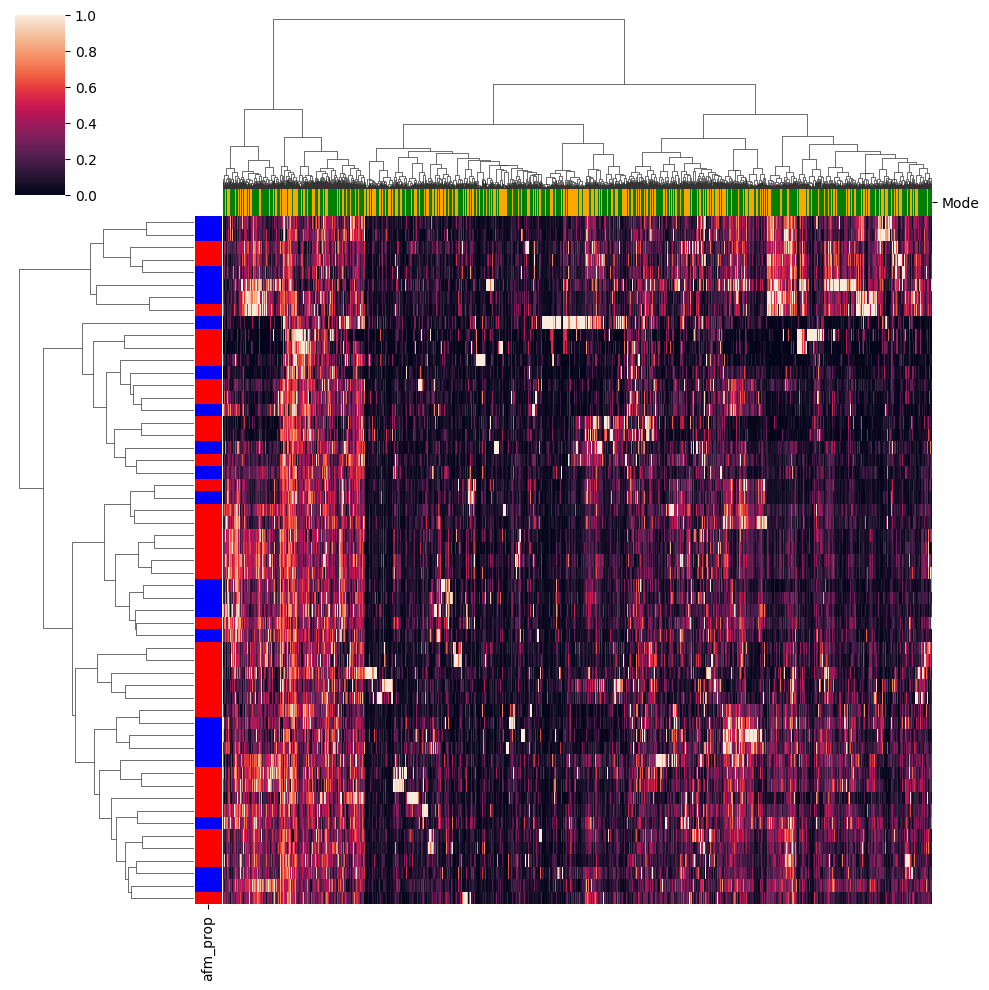

In [108]:
#lut = dict(zip(meta['Gender'].unique(), "rbg"))
lut = dict(zip(meta['afm_prop'].unique(), ["red","blue"]))
row_colors = meta['afm_prop'].map(lut)

#clist = list(sns.color_palette("RdBu_r", 24).as_hex())
lut = dict(zip(df['Mode'].unique(), ["green","orange"]))

column_colors = df['Mode'].map(lut)

#standard_scale
heat = sns.clustermap(data[data.columns[data.columns.isin(meta['Sample_ID'])]].T.reset_index(drop=True),
               row_colors=row_colors, standard_scale=1, method="ward", col_colors = column_colors,
               yticklabels=False, xticklabels=False)

fig = heat.figure.savefig("heatmap_all_prop.png")

In [29]:
cname = df.loc[df['Mode']=='T3_negative',
            ['Molecular weight (Da)', 'RT (min)']].reset_index().apply(lambda a: f'{round(a[0],2)}_{round(a[1],2)}', axis=1)
#cname = df[['Molecular weight (Da)', 'RT (min)']].reset_index().apply(lambda a: f'{round(a[0],2)}_{round(a[1],2)}', axis=1)

/tmp/ipykernel_647408/3989393082.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ['Molecular weight (Da)', 'RT (min)']].reset_index().apply(lambda a: f'{round(a[0],2)}_{round(a[1],2)}', axis=1)
/tmp/ipykernel_647408/3989393082.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cname = df[['Molecular weight (Da)', 'RT (min)']].reset_index().apply(lambda a: f'{round(a[0],2)}_{round(a[1],2)}', axis=1)


In [30]:
cname = [f'{i}_{cname[i]}' for i in range(len(cname))]
cname

['0_0.0_216.15',
 '1_1.0_117.08',
 '2_2.0_137.08',
 '3_3.0_204.09',
 '4_4.0_149.05',
 '5_5.0_104.11',
 '6_6.0_122.05',
 '7_7.0_136.04',
 '8_8.0_202.13',
 '9_9.0_129.08',
 '10_10.0_236.12',
 '11_11.0_181.07',
 '12_12.0_495.33',
 '13_13.0_181.07',
 '14_14.0_174.11',
 '15_15.0_113.06',
 '16_16.0_161.11',
 '17_17.0_302.14',
 '18_18.0_338.32',
 '19_19.0_562.26',
 '20_20.0_153.08',
 '21_21.0_280.11',
 '22_22.0_254.14',
 '23_23.0_523.36',
 '24_24.0_166.03',
 '25_25.0_186.1',
 '26_26.0_131.09',
 '27_27.0_294.12',
 '28_28.0_354.24',
 '29_29.0_129.08',
 '30_30.0_370.24',
 '31_31.0_232.14',
 '32_32.0_161.11',
 '33_33.0_285.14',
 '34_34.0_123.03',
 '35_35.0_216.11',
 '36_36.0_125.01',
 '37_37.0_350.21',
 '38_38.0_325.3',
 '39_39.0_236.12',
 '40_40.0_228.15',
 '41_41.0_150.08',
 '42_42.0_138.04',
 '43_43.0_272.18',
 '44_44.0_318.13',
 '45_45.0_305.14',
 '46_46.0_135.07',
 '47_47.0_182.08',
 '48_48.0_85.09',
 '49_49.0_366.2',
 '50_50.0_370.24',
 '51_51.0_255.26',
 '52_52.0_214.13',
 '53_53.0_342.12'

In [31]:
data_formatted = data[data.columns[data.columns.isin(meta['Sample_ID'])]].T
data_formatted.columns = cname
data_formatted.reset_index(inplace=True)
data_formatted.head()

,index,0_0.0_216.15,1_1.0_117.08,2_2.0_137.08,3_3.0_204.09,4_4.0_149.05,5_5.0_104.11,6_6.0_122.05,7_7.0_136.04,8_8.0_202.13,...,5123_5123.0_574.28,5124_5124.0_574.37,5125_5125.0_320.24,5126_5126.0_517.25,5127_5127.0_352.18,5128_5128.0_388.22,5129_5129.0_524.26,5130_5130.0_520.31,5131_5131.0_476.28,5132_5132.0_210.0
0,A1,0.003287,0.004535,0.027970,0.007030,0.000876,3.020641e-06,0.000036,0.005689,0.002121,...,2.515375e-04,0.000026,0.000003,0.000001,0.000018,0.000021,0.000039,6.317170e-07,0.000011,0.000004
1,A2,0.003292,0.007729,0.018481,0.003067,0.000133,2.614286e-07,0.000485,0.000928,0.009266,...,2.317598e-05,0.000028,0.000002,0.000028,0.000212,0.000026,0.000002,9.291607e-07,0.000015,0.000008
2,A3,0.004582,0.007060,0.028982,0.004271,0.000831,2.160638e-06,0.000261,0.000781,0.006776,...,2.402655e-05,0.000062,0.000002,0.000036,0.000044,0.000053,0.000011,7.532798e-06,0.000021,0.000006
3,A4,0.000486,0.026181,0.062127,0.020612,0.002467,1.032045e-05,0.008154,0.014770,0.000377,...,7.618046e-06,0.000013,0.000001,0.000049,0.000028,0.000174,0.000007,1.372343e-06,0.000005,0.000009
4,A5,0.003827,0.012217,0.029785,0.009594,0.001252,4.071577e-07,0.000316,0.000916,0.002903,...,9.207260e-07,0.000079,0.000006,0.000174,0.000593,0.000125,0.000025,7.330427e-07,0.000008,0.000014


In [32]:
meta.columns.tolist()

['Sample_ID',
 'Gender',
 'Age(years)',
 'Location of aspergilloma',
 'Diameter of fungal ball(mm)',
 'Duration of symptoms(years)',
 'Cough',
 'Haemoptysis',
 'Tuberculosis',
 'Bronchiectasis',
 'COPD',
 'ABPA',
 'Asthma',
 'Antifungal therapy',
 'Antibiotic therapy',
 'PAS\xa0stain',
 'GMS stain',
 'FEV1(litres)',
 'FVC(litres)',
 'FEV1/FVC ratio(%)',
 '% of predicted FEV₁/FVC',
 'DLCO SB (% of predicted)',
 'WBC( *10^12/L)',
 'Neutrophil( *10^9/L)',
 'Basophil( *10^9/L)',
 'Eosinophil( *10^9/L)',
 'Monocyte( *10^9/L)',
 'Lymphocyte( *10^9/L)',
 'Neu(%)',
 'Bas(%)',
 'Eos(%)',
 'Mono(%)',
 'Lym(%)',
 'Hemoglobin( g/L)',
 'Platelet( g/L)',
 'sample-id',
 'afm_prop']

In [33]:
import re
mcname = [f'ATTRIBUTE_{re.sub('\(.+\)|%|\/', '', x)}' for x in meta.columns.tolist()]
mcname = [x.replace(' ', '_') for x in mcname]
mcname[0] = 'filename'
mcname[15] = 'ATTRIBUTE_PAS_stain'
mcname[20] = 'ATTRIBUTE__of_predicted_FEV'
mcname[21] = 'ATTRIBUTE_DLCO_SB'
i = 0
for x in mcname:
    print(i , mcname[i])
    i += 1 

0 filename
1 ATTRIBUTE_Gender
2 ATTRIBUTE_Age
3 ATTRIBUTE_Location_of_aspergilloma
4 ATTRIBUTE_Diameter_of_fungal_ball
5 ATTRIBUTE_Duration_of_symptoms
6 ATTRIBUTE_Cough
7 ATTRIBUTE_Haemoptysis
8 ATTRIBUTE_Tuberculosis
9 ATTRIBUTE_Bronchiectasis
10 ATTRIBUTE_COPD
11 ATTRIBUTE_ABPA
12 ATTRIBUTE_Asthma
13 ATTRIBUTE_Antifungal_therapy
14 ATTRIBUTE_Antibiotic_therapy
15 ATTRIBUTE_PAS_stain
16 ATTRIBUTE_GMS_stain
17 ATTRIBUTE_FEV1
18 ATTRIBUTE_FVC
19 ATTRIBUTE_FEV1FVC_ratio
20 ATTRIBUTE__of_predicted_FEV
21 ATTRIBUTE_DLCO_SB
22 ATTRIBUTE_WBC
23 ATTRIBUTE_Neutrophil
24 ATTRIBUTE_Basophil
25 ATTRIBUTE_Eosinophil
26 ATTRIBUTE_Monocyte
27 ATTRIBUTE_Lymphocyte
28 ATTRIBUTE_Neu
29 ATTRIBUTE_Bas
30 ATTRIBUTE_Eos
31 ATTRIBUTE_Mono
32 ATTRIBUTE_Lym
33 ATTRIBUTE_Hemoglobin
34 ATTRIBUTE_Platelet
35 ATTRIBUTE_sample-id
36 ATTRIBUTE_afm_prop


<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
/tmp/ipykernel_647408/2685979924.py:2: SyntaxWarning: invalid escape sequence '\('
  mcname = [f'ATTRIBUTE_{re.sub('\(.+\)|%|\/', '', x)}' for x in meta.columns.tolist()]


In [34]:
meta.columns = mcname
afm_formatted = pd.merge(meta, data_formatted,
                 left_on='filename', right_on='index')

afm_formatted.drop(['index'], axis=1, inplace=True)
afm_formatted.head()

,filename,ATTRIBUTE_Gender,ATTRIBUTE_Age,ATTRIBUTE_Location_of_aspergilloma,ATTRIBUTE_Diameter_of_fungal_ball,ATTRIBUTE_Duration_of_symptoms,ATTRIBUTE_Cough,ATTRIBUTE_Haemoptysis,ATTRIBUTE_Tuberculosis,ATTRIBUTE_Bronchiectasis,...,5123_5123.0_574.28,5124_5124.0_574.37,5125_5125.0_320.24,5126_5126.0_517.25,5127_5127.0_352.18,5128_5128.0_388.22,5129_5129.0_524.26,5130_5130.0_520.31,5131_5131.0_476.28,5132_5132.0_210.0
0,A1,male,48,Right upper lobe,19.0,1.75,1,1,0,0,...,2.515375e-04,0.000026,0.000003,0.000001,0.000018,0.000021,0.000039,6.317170e-07,0.000011,0.000004
1,A2,female,51,Left lower lobe,14.0,0.42,1,1,0,0,...,2.317598e-05,0.000028,0.000002,0.000028,0.000212,0.000026,0.000002,9.291607e-07,0.000015,0.000008
2,A3,male,47,Left lower lobe,5.0,17.00,1,1,0,0,...,2.402655e-05,0.000062,0.000002,0.000036,0.000044,0.000053,0.000011,7.532798e-06,0.000021,0.000006
3,A4,male,64,Left lower lobe,25.4,0.25,0,0,0,0,...,7.618046e-06,0.000013,0.000001,0.000049,0.000028,0.000174,0.000007,1.372343e-06,0.000005,0.000009
4,A5,male,60,Left upper lobe,51.0,2.00,1,1,0,0,...,9.207260e-07,0.000079,0.000006,0.000174,0.000593,0.000125,0.000025,7.330427e-07,0.000008,0.000014


In [35]:
afm_formatted.to_csv('all_pcoa_formatted.csv', index=None)

In [36]:
from scipy import stats
from statsmodels.stats.multitest import multipletests

In [37]:
cn = 'ATTRIBUTE_afm_prop'
cs = afm_formatted['ATTRIBUTE_afm_prop'].unique()
cs[0]

'>50'

In [38]:
afm_formatted[afm_formatted.columns[~afm_formatted.columns.str.contains('ATTRIBUTE_|filename')]].shape

(55, 5133)

In [39]:
fnames = afm_formatted.columns[~afm_formatted.columns.str.contains('ATTRIBUTE_|filename')]

In [40]:
len(fnames.tolist())

5133

In [41]:
cn

'ATTRIBUTE_afm_prop'

In [42]:
afm_formatted.shape

(55, 5170)

In [43]:
import numpy as np

idx0 = afm_formatted.index[np.where(afm_formatted[cn]==cs[0])]
idx1 = afm_formatted.index[np.where(afm_formatted[cn]==cs[1])]
tkruskal = afm_formatted[fnames].apply(lambda a: stats.kruskal(a[idx0], a[idx1])).T
tkruskal.columns = ['statistic', 'pvalue']
pvals = tkruskal['pvalue']
pcor = multipletests(pvals, method='fdr_bh')[1]

In [44]:
fchange = afm_formatted[fnames].apply(lambda a: np.mean(a[idx0])/np.mean(a[idx1]))

In [45]:
afm_formatted.head()

,filename,ATTRIBUTE_Gender,ATTRIBUTE_Age,ATTRIBUTE_Location_of_aspergilloma,ATTRIBUTE_Diameter_of_fungal_ball,ATTRIBUTE_Duration_of_symptoms,ATTRIBUTE_Cough,ATTRIBUTE_Haemoptysis,ATTRIBUTE_Tuberculosis,ATTRIBUTE_Bronchiectasis,...,5123_5123.0_574.28,5124_5124.0_574.37,5125_5125.0_320.24,5126_5126.0_517.25,5127_5127.0_352.18,5128_5128.0_388.22,5129_5129.0_524.26,5130_5130.0_520.31,5131_5131.0_476.28,5132_5132.0_210.0
0,A1,male,48,Right upper lobe,19.0,1.75,1,1,0,0,...,2.515375e-04,0.000026,0.000003,0.000001,0.000018,0.000021,0.000039,6.317170e-07,0.000011,0.000004
1,A2,female,51,Left lower lobe,14.0,0.42,1,1,0,0,...,2.317598e-05,0.000028,0.000002,0.000028,0.000212,0.000026,0.000002,9.291607e-07,0.000015,0.000008
2,A3,male,47,Left lower lobe,5.0,17.00,1,1,0,0,...,2.402655e-05,0.000062,0.000002,0.000036,0.000044,0.000053,0.000011,7.532798e-06,0.000021,0.000006
3,A4,male,64,Left lower lobe,25.4,0.25,0,0,0,0,...,7.618046e-06,0.000013,0.000001,0.000049,0.000028,0.000174,0.000007,1.372343e-06,0.000005,0.000009
4,A5,male,60,Left upper lobe,51.0,2.00,1,1,0,0,...,9.207260e-07,0.000079,0.000006,0.000174,0.000593,0.000125,0.000025,7.330427e-07,0.000008,0.000014


In [46]:
afm_formatted.shape

(55, 5170)

In [47]:
meta.shape

(58, 37)

In [48]:
afm_formatted.iloc[:, 34:].head()

,ATTRIBUTE_Platelet,ATTRIBUTE_sample-id,ATTRIBUTE_afm_prop,0_0.0_216.15,1_1.0_117.08,2_2.0_137.08,3_3.0_204.09,4_4.0_149.05,5_5.0_104.11,6_6.0_122.05,...,5123_5123.0_574.28,5124_5124.0_574.37,5125_5125.0_320.24,5126_5126.0_517.25,5127_5127.0_352.18,5128_5128.0_388.22,5129_5129.0_524.26,5130_5130.0_520.31,5131_5131.0_476.28,5132_5132.0_210.0
0,86,A1,>50,0.003287,0.004535,0.027970,0.007030,0.000876,3.020641e-06,0.000036,...,2.515375e-04,0.000026,0.000003,0.000001,0.000018,0.000021,0.000039,6.317170e-07,0.000011,0.000004
1,209,A2,>50,0.003292,0.007729,0.018481,0.003067,0.000133,2.614286e-07,0.000485,...,2.317598e-05,0.000028,0.000002,0.000028,0.000212,0.000026,0.000002,9.291607e-07,0.000015,0.000008
2,304,A3,<50,0.004582,0.007060,0.028982,0.004271,0.000831,2.160638e-06,0.000261,...,2.402655e-05,0.000062,0.000002,0.000036,0.000044,0.000053,0.000011,7.532798e-06,0.000021,0.000006
3,197,A4,<50,0.000486,0.026181,0.062127,0.020612,0.002467,1.032045e-05,0.008154,...,7.618046e-06,0.000013,0.000001,0.000049,0.000028,0.000174,0.000007,1.372343e-06,0.000005,0.000009
4,277,A5,<50,0.003827,0.012217,0.029785,0.009594,0.001252,4.071577e-07,0.000316,...,9.207260e-07,0.000079,0.000006,0.000174,0.000593,0.000125,0.000025,7.330427e-07,0.000008,0.000014


In [49]:
df.loc[df['Mode']=='T3_negative'].shape

(2097, 87)

In [50]:
len(pvals)

5133

In [51]:
pcor

array([0.40033184, 0.76905986, 0.7474868 , ..., 0.55694121, 0.63460849,
       0.57853074], shape=(5133,))

In [52]:
df.loc[df['Mode']=='T3_negative'].tail()

,Index,Mode,Compounds,物质,Class I,物质一级分类,Class II,物质二级分类,Formula,Q1 (Da),...,A60,A61,A62,QC01,QC02,QC03,QC04,QC05,QC06,kegg_map
5128,MW0012464,T3_negative,15-keto Latanoprost(free acid),-,FA,脂肪酰类,Oxidized lipids,氧化脂质,C23H32O5,369.2158,...,11208463.35,16432116.26,954016.28,13453988.26,13783294.01,13912835.15,13752087.94,13661207.40,13315297.55,-
5129,FDATN01205,T3_negative,Fedratinib,-,Others,其他,Medicine,药物,C27H36N6O3S,523.2520,...,626127.72,6725228.48,1745957.08,2614980.82,2633890.00,2555291.88,2668234.11,2812042.30,2549536.64,-
5130,MW0153087,T3_negative,Lys-Phe-Ala-Arg,-,Amino acid and Its metabolites,氨基酸及其代谢物,Small Peptide,小肽,C24H40N8O5,519.3155,...,811734.76,193392.32,185552.39,322940.91,291734.35,309046.18,316779.46,243190.42,339158.06,-
5131,ZINC38336119,T3_negative,Trichurusin J,-,FA,脂肪酰类,Others,其他,C27H40O7,475.2776,...,2113527.98,12187028.76,12715689.24,5580781.83,5613683.46,5673771.74,5624070.77,5592078.18,5628879.93,-
5132,MW0006771,T3_negative,"2,4-Cyclohexadien-1-one, 6-diazo-2,4-dinitro-",-,Heterocyclic compounds,杂环化合物,Heterocyclic compounds,杂环化合物,C6H2N4O5,244.9652,...,3799733.68,2665707.81,2773107.35,2629766.02,2085507.97,2644480.47,2538741.10,2690975.94,2873451.32,-


In [53]:
df.loc[df['Mode']=='T3_negative', 'cpd_ID'].shape

(2097,)

In [54]:
len(df.loc[df['Mode']=='T3_negative', 'kegg_map'].tolist())

2097

In [55]:
#diffexp_df = pd.DataFrame([fnames, df.loc[df['Mode']=='T3_positive', 'Molecular weight (Da)'].tolist(),  
#                          np.log2(fchange), pvals, pcor,  df.loc[df['Mode']=='T3_negative', 'cpd_ID'].tolist(), 
#                          df.loc[df['Mode']=='T3_negative', 'kegg_map'].tolist()]).T
diffexp_df = pd.DataFrame([fnames, df.loc[df['Mode']=='T3_positive', 'Molecular weight (Da)'].tolist(),  
                          np.log2(fchange), pvals, pcor,  df['cpd_ID'].tolist(), 
                          df['kegg_map'].tolist()]).T
diffexp_df.columns = ['names', 'scores', 'logfoldchanges', 'pvals', 'pvals_adj', 'symbol', 'entrez']

diffexp_df.head()

,names,scores,logfoldchanges,pvals,pvals_adj,symbol,entrez
0,0_0.0_216.15,216.1474,0.4606,0.023242,0.400332,-,-
1,1_1.0_117.08,117.079,-0.229793,0.425508,0.76906,C00183,"ko00280,ko00290,ko00311,ko00460,ko00770,ko0097..."
2,2_2.0_137.08,137.0841,-0.065416,0.395951,0.747487,C02735,-
3,3_3.0_204.09,204.0899,-0.325113,0.136261,0.565878,C00078,"ko00260,ko00380,ko00400,ko00404,ko00901,ko0097..."
4,4_4.0_149.05,149.051,-0.456661,0.136261,0.565878,C00073,"ko00270,ko00470,ko00970,ko00999,ko01100,ko0111..."


In [56]:
df.shape

(5133, 87)

In [57]:
df[['Molecular weight (Da)', 'RT (min)', 'Compounds']].head()

,Molecular weight (Da),RT (min),Compounds
0,216.1474,1.2656,Val-val
1,117.0790,0.9037,L-Valine
2,137.0841,1.7648,2-Amino-1-phenylethanol
3,204.0899,2.3150,L-Tryptophan
4,149.0510,1.1786,Methionine


In [58]:
diffexp_df['Compounds'] = df.reset_index()['Compounds']
diffexp_df.head()

,names,scores,logfoldchanges,pvals,pvals_adj,symbol,entrez,Compounds
0,0_0.0_216.15,216.1474,0.4606,0.023242,0.400332,-,-,Val-val
1,1_1.0_117.08,117.079,-0.229793,0.425508,0.76906,C00183,"ko00280,ko00290,ko00311,ko00460,ko00770,ko0097...",L-Valine
2,2_2.0_137.08,137.0841,-0.065416,0.395951,0.747487,C02735,-,2-Amino-1-phenylethanol
3,3_3.0_204.09,204.0899,-0.325113,0.136261,0.565878,C00078,"ko00260,ko00380,ko00400,ko00404,ko00901,ko0097...",L-Tryptophan
4,4_4.0_149.05,149.051,-0.456661,0.136261,0.565878,C00073,"ko00270,ko00470,ko00970,ko00999,ko01100,ko0111...",Methionine


In [59]:
diffexp_df.shape

(5133, 8)

In [60]:
diffexp_df.to_csv('univariate_result_all.tsv', sep='\t', index=None)

In [61]:
import itertools
pths = [x.split(',') for x in diffexp_df['entrez'] if x!='-']
pths = list(set(itertools.chain.from_iterable(pths)))

In [62]:
len(pths)

166

In [63]:
pths[:10]

['ko00630',
 'ko00330',
 'ko00460',
 'ko00920',
 'ko00232',
 'ko00910',
 'ko00622',
 'ko00592',
 'ko01502',
 'ko01200']

In [64]:
afm_pths = pd.read_csv('https://rest.kegg.jp/list/pathway/afm', sep='\t', header=None)
afm_pths

,0,1
0,afm01100,Metabolic pathways - Aspergillus fumigatus
1,afm01110,Biosynthesis of secondary metabolites - Asperg...
2,afm01200,Carbon metabolism - Aspergillus fumigatus
3,afm01210,2-Oxocarboxylic acid metabolism - Aspergillus ...
4,afm01212,Fatty acid metabolism - Aspergillus fumigatus
...,...,...
146,afm04977,Vitamin digestion and absorption - Aspergillus...
147,afm04981,Folate transport and metabolism - Aspergillus ...
148,afm04382,Cornified envelope formation - Aspergillus fum...
149,afm05100,Bacterial invasion of epithelial cells - Asper...


In [65]:
import json

with open('afm_pathways.json') as f:
    pths_cpd2 = json.load(f)

In [66]:
def getCompoundsbyPathway(pathID, orgID='afm'):
    pathID = pathID.replace('afm', 'map')
    try:
        cpds = pd.read_csv(f'https://rest.kegg.jp/link/compound/{pathID}', 
                          sep='\t', header=None)
    except:
        return {pathID : []}
    return {pathID : cpds[1].tolist()}

In [73]:
pths_cpd = []
for p in afm_pths[0]:
    pths_cpd.append(getCompoundsbyPathway(p))

In [67]:
len(pths_cpd2)

151

In [68]:
pths_cpd = pths_cpd2
len(pths_cpd)

151

In [69]:
len([list(x.values())[0] for x in pths_cpd if x.values()] )

151

In [77]:
import json

with open('afm_pathways.json', 'w+') as f:
    json.dump(pths_cpd, f, sort_keys=True, indent=4)

In [70]:
all_afm_pths = [list(x.values())[0] for x in pths_cpd if list(x.values())]
afm_cpd = list(set(itertools.chain.from_iterable(all_afm_pths)))
len(afm_cpd)

4904

In [71]:
from scipy.stats import hypergeom

N1 = len(afm_cpd) # all compounds in the metabolism

res = []
for pt in pths_cpd:
    npt = list(pt.keys())[0]
    min_inds = diffexp_df[diffexp_df.entrez.str.contains(npt.replace('map', ''))].groupby("symbol", sort=False).pvals.idxmin()
    m1 = len(list(pt.values())[0]) # compounds of a given pathway
    r1 = diffexp_df.loc[min_inds].shape[0] # annotated in that pathway
    k1 = (diffexp_df.loc[min_inds, 'pvals']<0.05).sum() # diff expressed
    
    rv = hypergeom(N1, m1, r1)
    pval = 1-rv.cdf(k1-1)
    nm = afm_pths.loc[afm_pths[0].str.contains(npt.replace('map', '')), 1].values[0]
    
    tmp = diffexp_df.loc[min_inds]
    p = [f'{x}%09red' for x in tmp.loc[tmp['logfoldchanges']>0, 'symbol']]
    n = [f'{x}%09blue' for x in tmp.loc[tmp['logfoldchanges']<0, 'symbol']]
    link = "http://www.kegg.jp/kegg-bin/show_pathway?ko%s" %  npt.replace('map', '')
    res.append([nm, npt, m1, r1, k1, pval, '/'.join([link]+p+n)]) 

In [72]:
enr = pd.DataFrame(res)
enr.columns = ['Pathway name', 'ID', 'N° compounds', 'N° Annotated', 'N° diff expressed', 'pval', 'link']
enr.drop([0,1], inplace=True)
enr = enr.sort_values('N° diff expressed', ascending=False)
enr['log10'] = -np.log10(enr['pval'])
enr.reset_index(inplace=True, drop=True)
enr.reset_index(inplace=True)
enr['Pathway name'] = enr['Pathway name'].str.replace(' - Aspergillus fumigatus', '')
enr.head()

,index,Pathway name,ID,N° compounds,N° Annotated,N° diff expressed,pval,link,log10
0,0,Biosynthesis of cofactors,map01240,330,56,6,1.722610e-01,http://www.kegg.jp/kegg-bin/show_pathway?ko012...,0.763813
1,1,Tryptophan metabolism,map00380,84,32,6,1.338623e-05,http://www.kegg.jp/kegg-bin/show_pathway?ko003...,4.873342
2,2,"Glycine, serine and threonine metabolism",map00260,48,24,6,7.509462e-08,http://www.kegg.jp/kegg-bin/show_pathway?ko002...,7.124391
3,3,Pyruvate metabolism,map00620,32,10,5,2.102452e-09,http://www.kegg.jp/kegg-bin/show_pathway?ko006...,8.677274
4,4,Biosynthesis of amino acids,map01230,128,48,5,7.808876e-03,http://www.kegg.jp/kegg-bin/show_pathway?ko012...,2.107411


In [73]:
enr.tail()

,index,Pathway name,ID,N° compounds,N° Annotated,N° diff expressed,pval,link,log10
144,144,Vitamin digestion and absorption,map04977,42,0,0,1.0,http://www.kegg.jp/kegg-bin/show_pathway?ko04977,-0.0
145,145,Folate transport and metabolism,map04981,20,0,0,1.0,http://www.kegg.jp/kegg-bin/show_pathway?ko04981,-0.0
146,146,Cornified envelope formation,map04382,16,0,0,1.0,http://www.kegg.jp/kegg-bin/show_pathway?ko04382,-0.0
147,147,Bacterial invasion of epithelial cells,map05100,0,0,0,1.0,http://www.kegg.jp/kegg-bin/show_pathway?ko05100,-0.0
148,148,beta-Lactam resistance,map01501,3,0,0,1.0,http://www.kegg.jp/kegg-bin/show_pathway?ko01501,-0.0


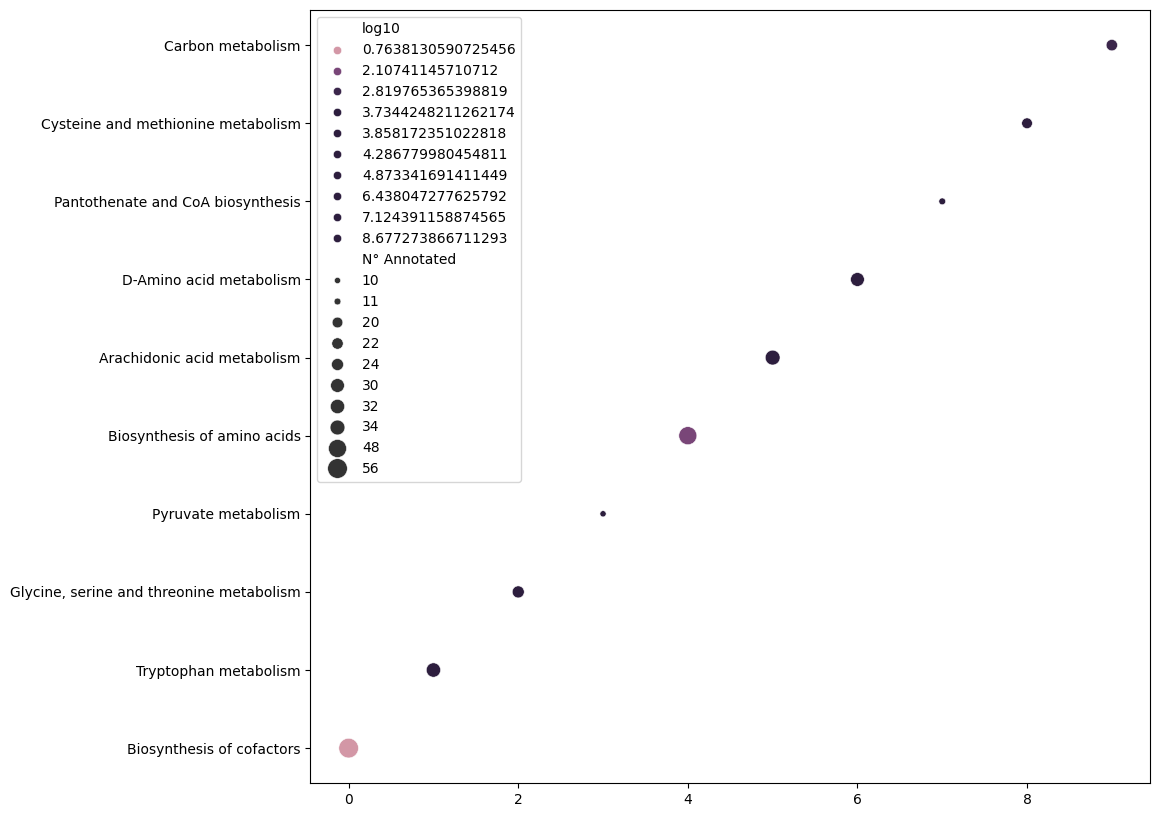

In [74]:
# https://keggtools.org/vignette.html
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 11.7,8.27
rcParams.update({'figure.autolayout': True})

sns.scatterplot(
    data=enr.head(10), x="index", y="index", hue="log10", size="N° Annotated",
    sizes=(20, 200), hue_norm=(0, 3), legend="full"
)
plt.yticks(range(10), enr.loc[range(10), 'Pathway name'])
plt.xlabel("")
plt.ylabel("")


plt.savefig("enrichment_all_prop.png")

In [75]:
enr.to_csv('enrichment_result_all.tsv', sep='\t', index=None)